<a href="https://colab.research.google.com/github/lschoch/MLA_LHS/blob/main/FinalProject_Regression_LHS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning Final Project - Regression**  
## **Lawrence Schoch**
## **CS430**
## **Machine Learning in the Cloud** 
---

## Introduction
The Auto MPG dataset can be found in UC Irvine Machine Learning Repository at <br>[https://archive-beta.ics.uci.edu/ml/datasets/auto+mpg#Descriptive](https://).<br>The dataset contains 398 instances with 9 attributes. One of the attributes is the target variable, "mpg", and one is the vehicle name that is unigue to each instance, leaving 7 attributes for data modeling. Of these 7 attributes, 3 are categorical and 4 are continuous. The target variable is also continuous and therefore its modeling is a regression task. For this problem, two models were implemented, linear regression and a support vector machine with grid search. The data file will be submitted separately in an archive file named 'auto-mpg.zip.' The original data file was renamed from 'auto-mpg.data' to 'auto-mpg.txt.' The archive also contains a file with descriptive information named 'auto-mpg.names.'

## Standard Imports

In [273]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [274]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Imports for Specific Models

In [275]:
# Import the linear regression model.
from sklearn.linear_model import LinearRegression
# Import the support vector model.
from sklearn.svm import SVR

## Imports for Splitting Data and Building Pipeline


In [276]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV

In [277]:
from sklearn import set_config
set_config(display='diagram')

## Imports for Performance Measures

In [278]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

## Reading the Data

In [279]:
# Read the file and replace values listed as '?' with 'NaN'
df = pd.read_csv("/content/gdrive/MyDrive/1CS430/auto-mpg.txt", delim_whitespace=True, header=None, na_values='?')

In [280]:
# Add column names.
names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']
df.columns = names
df.dtypes


mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model_year        int64
origin            int64
car_name         object
dtype: object

## Statistical and Visual Exploration

In [281]:
# View a random sample of 10 rows of the dataframe
df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
75,14.0,8,318.0,150.0,4077.0,14.0,72,1,plymouth satellite custom (sw)
111,18.0,3,70.0,90.0,2124.0,13.5,73,3,maxda rx3
366,17.6,6,225.0,85.0,3465.0,16.6,81,1,chrysler lebaron salon
28,9.0,8,304.0,193.0,4732.0,18.5,70,1,hi 1200d
258,20.6,6,231.0,105.0,3380.0,15.8,78,1,buick century special
221,17.5,8,305.0,145.0,3880.0,12.5,77,1,chevrolet caprice classic
169,20.0,6,232.0,100.0,2914.0,16.0,75,1,amc gremlin
176,19.0,6,232.0,90.0,3211.0,17.0,75,1,amc pacer
25,10.0,8,360.0,215.0,4615.0,14.0,70,1,ford f250
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


In [282]:
# Get counts and common statistics for the dataframe.
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [283]:
# Summarize the number of missing values in each column
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

In [284]:
# Get itemized counts for cylinders.
df['cylinders'].value_counts().sort_index()

3      4
4    204
5      3
6     84
8    103
Name: cylinders, dtype: int64

In [285]:
# Get itemized counts for model_year
df['model_year'].value_counts().sort_index()

70    29
71    28
72    28
73    40
74    27
75    30
76    34
77    28
78    36
79    29
80    29
81    29
82    31
Name: model_year, dtype: int64

In [286]:
# Get itemized counts for origin
df['origin'].value_counts().sort_index()

1    249
2     70
3     79
Name: origin, dtype: int64

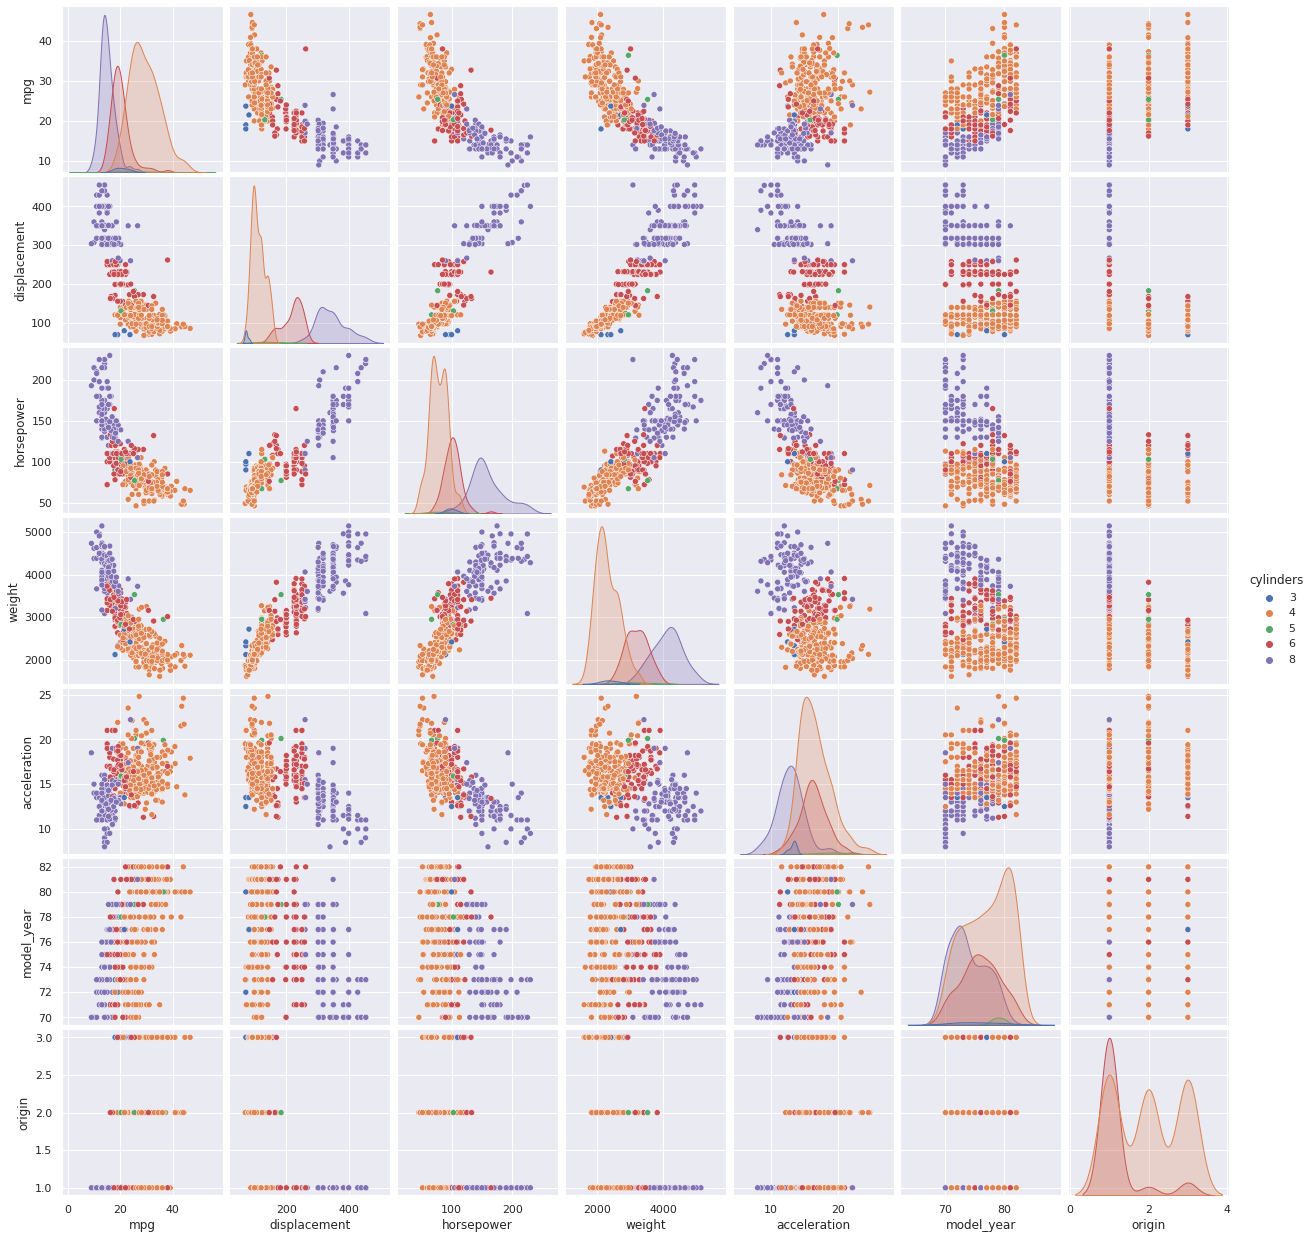

In [287]:
# Create a pairplot of all of the numerical variables using Seaborn, color-coded by load_type.
pp = sns.pairplot(df, hue='cylinders', palette = 'deep')

## Splitting the Data

In [288]:
# For X include all columns except first and last (first column is the target variable, last column is unique for each instance).
X = df.iloc[:,1:-1]
y = df[['mpg']]
# Split the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

## Replacing the Missing Horsepower Values With the Median

In [289]:
# Calculate the median value.
med = df['horsepower'].median()
# Replace NaN values.
X_train['horsepower'].fillna(value=med, inplace=True)
X_test['horsepower'].fillna(value=med, inplace=True)

## Building the Pipeline for a Linear Regression Model

In [290]:
# Define column transformer
num_attribs = ['displacement', 'horsepower', 'weight', 'acceleration']
cat_attribs = ['cylinders', 'model_year', 'origin']
col_transform = ColumnTransformer(transformers=[
                                 ('num', MinMaxScaler(), num_attribs),
                                 ('cat', OneHotEncoder(), cat_attribs)],
                                  remainder='passthrough')
# Define model
model = LinearRegression()
# Define pipeline
pipeline = Pipeline(steps=[('trans', col_transform), ('lr_mod', model)])
pipeline

Pipeline(steps=[('trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['displacement', 'horsepower',
                                                   'weight', 'acceleration']),
                                                 ('cat', OneHotEncoder(),
                                                  ['cylinders', 'model_year',
                                                   'origin'])])),
                ('lr_mod', LinearRegression())])

## Executing the Linear Regression Model

In [291]:
pipeline.fit(X_train, np.ravel(y_train))

Pipeline(steps=[('trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['displacement', 'horsepower',
                                                   'weight', 'acceleration']),
                                                 ('cat', OneHotEncoder(),
                                                  ['cylinders', 'model_year',
                                                   'origin'])])),
                ('lr_mod', LinearRegression())])

### Evaluating the Linear Regression Model

In [292]:
# Make predictions on the training data.
y_train_pred = pipeline.predict(X_train)
# Make predictions on the test data.
y_pred = pipeline.predict(X_test)
# Get the root mean square errors for both 
RMSE_train = (mean_squared_error(y_train, y_train_pred))**.5
RMSE_test = (mean_squared_error(y_test, y_pred))**.5
print('RMSE_train =',RMSE_train,'  RMSE_test =',RMSE_test)

RMSE_train = 2.821166633032381   RMSE_test = 2.805463888295235


                          R-square = 0.8465347849228604



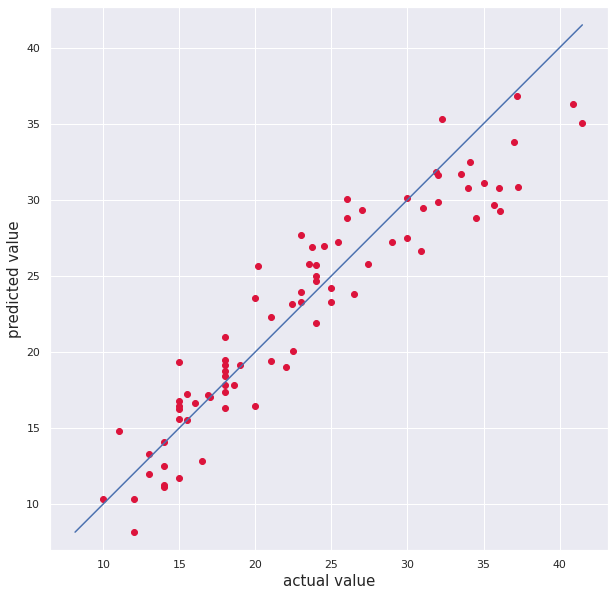

In [293]:
# Get the R-square value for the model.
r_square = r2_score(y_pred, y_test)
print('                          R-square =', r_square)
print()
# Plot predicted vs actual values
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')
true_value = np.ravel(y_test)
p2 = max(y_pred.max(), true_value.max())
p1 = min(y_pred.min(), true_value.min())
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('actual value', fontsize=15)
plt.ylabel('predicted value', fontsize=15)
plt.axis('equal')
plt.show()

## Building the Pipeline for a Support Vector Machine Model

In [294]:
# Define column transformer
num_attribs = ['displacement', 'horsepower', 'weight', 'acceleration']
cat_attribs = ['cylinders', 'model_year', 'origin']
col_transform = ColumnTransformer(transformers=[
                                 ('num', MinMaxScaler(), num_attribs),
                                 ('cat', OneHotEncoder(), cat_attribs)],
                                  remainder='passthrough')
# Define pipeline
pipeline2 = Pipeline(steps=[('trans', col_transform), ('svr_mod', SVR())])
pipeline2

Pipeline(steps=[('trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['displacement', 'horsepower',
                                                   'weight', 'acceleration']),
                                                 ('cat', OneHotEncoder(),
                                                  ['cylinders', 'model_year',
                                                   'origin'])])),
                ('svr_mod', SVR())])

In [295]:
# Implement grid search
parameters = {
   'svr_mod__kernel':['linear','poly'],
   'svr_mod__C':[1,10,20,30],
   'svr_mod__epsilon':[.1,1,2,3],
   'svr_mod__degree':[2,3,4]
    }
grid_pipeline = GridSearchCV(pipeline2,parameters)

## Executing the Support Vector Machine Model with Grid Search

In [296]:
grid_pipeline.fit(X_train, np.ravel(y_train))

GridSearchCV(estimator=Pipeline(steps=[('trans',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['displacement',
                                                                          'horsepower',
                                                                          'weight',
                                                                          'acceleration']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['cylinders',
                                                                          'model_year',
                                                                          'origin'])])),
                                       ('svr_mod', SVR())]),
             param_grid={'svr_mod__C': [1, 10, 20, 30],
                         'svr_mod__degree': [2, 3, 4],
                         'svr_mod__epsilon': [0.1, 1, 2, 3],
                         'svr_mod__kernel': ['linear', 'poly']})

## Evaluating the Support Vector Machine Model

In [297]:
# Make predictions on the training data.
y_train_pred2 = grid_pipeline.predict(X_train)
# Make predictions on the test data.
y_pred2 = grid_pipeline.predict(X_test)

# Get the best parameters from the grid search
print('Best parameters: ',grid_pipeline.best_params_)

# Get the root mean square errors for both 
RMSE_train2 = (mean_squared_error(y_train, y_train_pred2))**.5
RMSE_test2 = (mean_squared_error(y_test, y_pred2))**.5
print('RMSE_train =',RMSE_train2,'  RMSE_test =',RMSE_test2)

Best parameters:  {'svr_mod__C': 20, 'svr_mod__degree': 2, 'svr_mod__epsilon': 1, 'svr_mod__kernel': 'poly'}
RMSE_train = 2.2517165283645264   RMSE_test = 2.2292114728883625


                          R-square = 0.9013411540790405



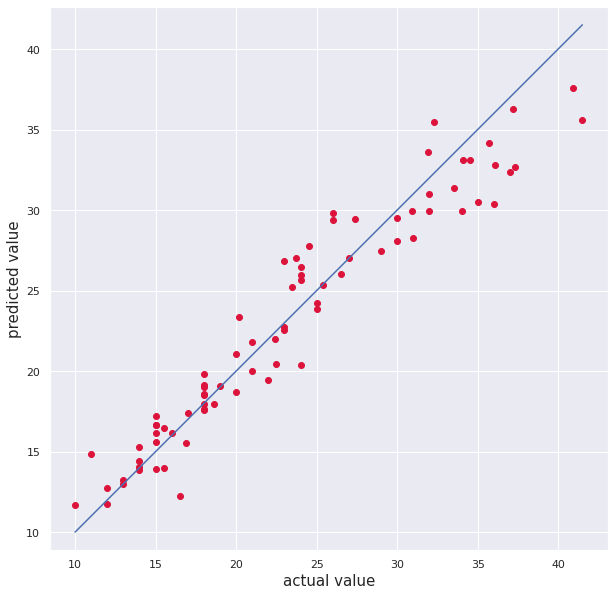

In [298]:
# Get the R-square value for the model.
r_square2 = r2_score(y_pred2, y_test)
print('                          R-square =', r_square2)
print()

# Plot predicted vs actual values
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred2, c='crimson')
true_value = np.ravel(y_test)
p2 = max(y_pred2.max(), true_value.max())
p1 = min(y_pred2.min(), true_value.min())
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('actual value', fontsize=15)
plt.ylabel('predicted value', fontsize=15)
plt.axis('equal')
plt.show()

## Conclusion
The RMSE values for the linear regresssion model were 2.82 for the training data and 2.81 for the test data with a regression coefficient of 85%. Using an SVR support vector machine with grid search produced optimal parameters of C=20 and epsilon=1 with a polynomial kernel of degree 2. With these parameters, the SVR model outperformed the linear regression model returning RMSE values of 2.25 and 2.23 for the train and test data respectively with regression coefficient improved from 85% to 90% There was no indication of overfitting with either model since the RMSE for the test data was slightly less than the RMSE for the train data for both. The SVR model would be acceptable to predict miles per gallon with the provided input parameters. 